In [239]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd  
import numpy as np
from geopy.geocoders import Nominatim
from shapely.geometry import Point
from adjustText import adjust_text
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

### Get the US County Polygon Data from the Census

In [240]:
county_shapes = gpd.read_file("/Users/nelsonfarrell/Documents/Northeastern/projects/hospital_beds/gis_data/cb_2023_us_county_500k.zip")

### Filter for Maine Counties

In [241]:
maine_counties = county_shapes[county_shapes.STATE_NAME == "Maine"].copy()

In [242]:
maine_counties.rename(columns = {"NAME":"county"}, inplace = True )

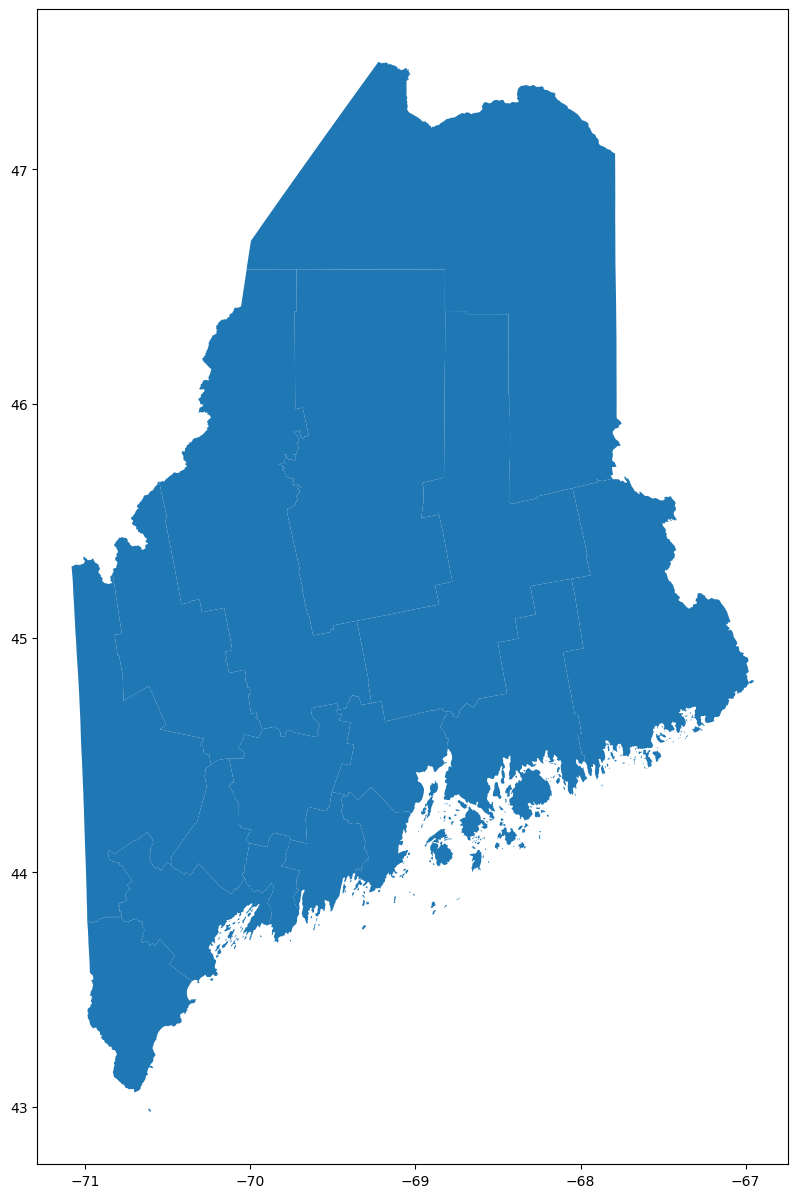

In [243]:
maine_counties.plot(figsize = (10, 15));

### Generate Regoin Mapping ~ Groups of Counties

In [244]:
region_map = {
                "Cumberland County" : 1,
                "York County" : 1,
                "Oxford County" : 2,
                "Kennebec County" : 3,
                "Knox County" : 4,
                "Lincoln County" : 4,
                "Somerset County": 3,
                "Washington County" : 7,
                "Hancock County" : 7,
                "Waldo County" : 4,
                "Penobscot County" : 6,
                "Aroostook County" : 5,
                "Piscataquis County" : 6,
                "Sagadahoc County" : 4,
                "Androscoggin County" : 3,
                "Franklin County": 2
              }

region_colors = {
                    1 : '#85c1e9',  # Light Blue
                    2 : '#c39bd3',  # Light Purple
                    3 : '#a3e4d7', # Light Green
                    4 : '#7dcea0',  # Light Red
                    5 : '#f8c471', # Light Orange
                    6 : "#f1948a", # Light Grey
                    7 : "#edbb99" # Light orange
                }

maine_counties.loc[:, "region"] = maine_counties["NAMELSAD"].map(region_map)
maine_counties.loc[:, "color"] = maine_counties["region"].map(region_colors)

In [245]:
maine_counties

,STATEFP,COUNTYFP,COUNTYNS,GEOIDFQ,GEOID,county,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry,region,color
51,23,015,00581293,0500000US23015,23015,Lincoln,Lincoln County,ME,Maine,06,1180688993,631299424,"MULTIPOLYGON (((-69.32357 43.75899, -69.32114 ...",4,#7dcea0
52,23,017,00581294,0500000US23017,23017,Oxford,Oxford County,ME,Maine,06,5379294383,255884970,"POLYGON ((-71.08000 45.30699, -71.07841 45.306...",2,#c39bd3
195,23,023,00581297,0500000US23023,23023,Sagadahoc,Sagadahoc County,ME,Maine,06,657801805,300571247,"MULTIPOLYGON (((-69.76031 43.71044, -69.75904 ...",4,#7dcea0
432,23,027,00581299,0500000US23027,23027,Waldo,Waldo County,ME,Maine,06,1890642742,317988397,"MULTIPOLYGON (((-68.94229 44.28436, -68.94063 ...",4,#7dcea0
435,23,025,00581298,0500000US23025,23025,Somerset,Somerset County,ME,Maine,06,10163811939,437942552,"POLYGON ((-70.55279 45.66784, -70.54730 45.666...",3,#a3e4d7
541,23,021,00581296,0500000US23021,23021,Piscataquis,Piscataquis County,ME,Maine,06,10258545867,1080517302,"POLYGON ((-69.83118 45.73860, -69.82943 45.738...",6,#f1948a
710,23,031,00581301,0500000US23031,23031,York,York County,ME,Maine,06,2567186511,721352437,"MULTIPOLYGON (((-70.61725 42.99202, -70.61467 ...",1,#85c1e9
911,23,007,00581289,0500000US23007,23007,Franklin,Franklin County,ME,Maine,06,4395226704,121284631,"POLYGON ((-70.83554 45.29380, -70.82755 45.296...",2,#c39bd3
1287,23,003,00581287,0500000US23003,23003,Aroostook,Aroostook County,ME,Maine,06,17278162809,405078327,"POLYGON ((-70.01975 46.59217, -69.99709 46.695...",5,#f8c471
1925,23,019,00581295,0500000US23019,23019,Penobscot,Penobscot County,ME,Maine,06,8798661091,414021728,"POLYGON ((-69.35567 45.07347, -69.24996 45.087...",6,#f1948a


/var/folders/jw/62ly49f15zj22rm_89qjsv940000gn/T/ipykernel_40247/777560116.py:4: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  maine_counties.plot(column='region',


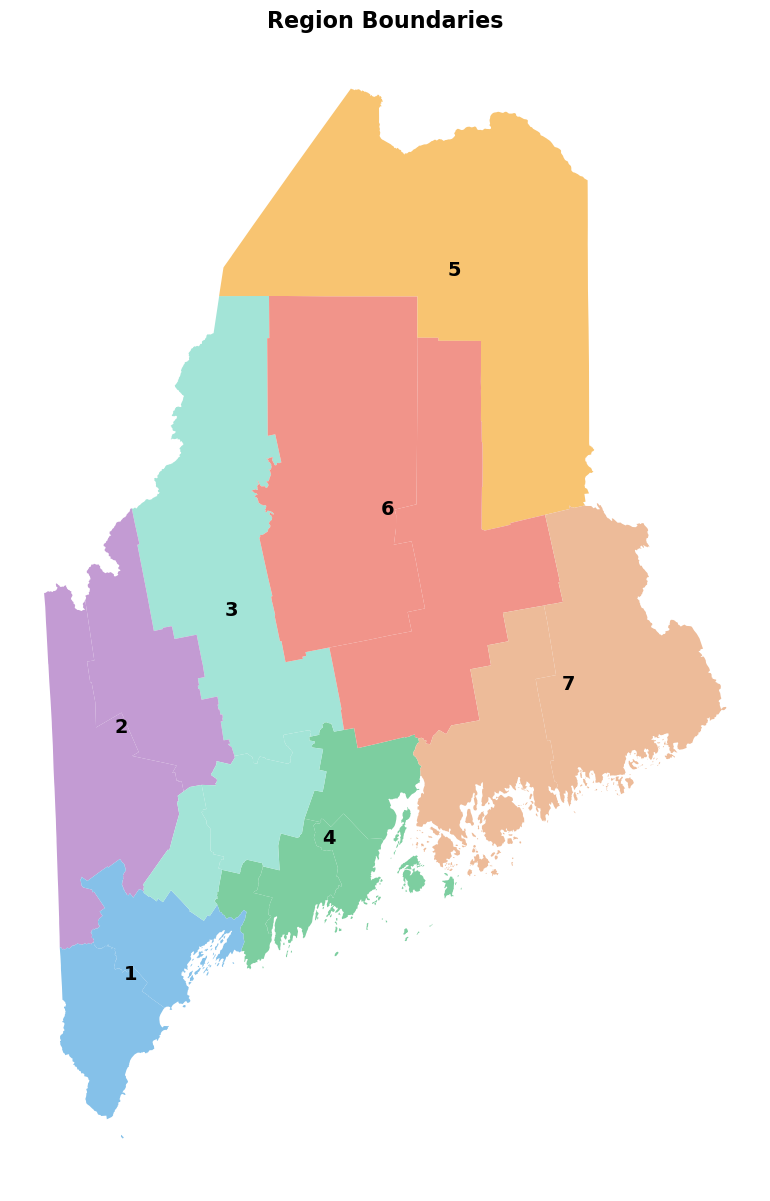

In [342]:
# Plot the map, coloring by region
fig, ax = plt.subplots(figsize=(10, 15))

maine_counties.plot(column='region', 
                   color = maine_counties["color"],  
                   legend = True,   
                   figsize=(10, 15),
                   ax = ax)

# This changes the borders from county to region; the agg function makes it keep only one of the values,
# rather than a sum. Since grouped_df already contains region totals, this is accurate.
region_geometries = maine_counties.dissolve(by='region').reset_index()

# Display totals in the center of the region
for idx, row in region_geometries.iterrows():
    if not pd.isna(row['region']):  

        # Get the center of the region
        centroid = row['geometry'].centroid
        x, y = centroid.x, centroid.y
        ax.text(
            x, y,
            f"{int(row['region'])}",
            ha="center", fontsize=14, color = "black", weight="bold"
        )   
ax.axis("off")
plt.title("Region Boundaries", weight = "bold", fontsize = 16)
fig.savefig("../figs/region_definitions.png", dpi = 300, bbox_inches="tight")
plt.show()


### Read In Hospital Response Data

In [247]:
response_data_full = pd.read_csv("/Users/nelsonfarrell/Documents/Northeastern/projects/hospital_beds/survey_data/CSV/response_data_clean.csv")

In [248]:
response_data_full.shape

(25, 161)

In [249]:
response_data_full.loc[:, ["hospital_name", "hospital_address"]]

,hospital_name,hospital_address
0,Central Maine Medical Center,"300 Main Street, Lewiston, ME 04240)"
1,Penobscot Valley Hospital,"7 Transalpine Road, P.O. Box 368, Lincoln, ME ..."
2,Franklin Memorial Hospital,"111 Franklin Health Commons, Farmington, ME 04938"
3,Northern Light Mayo Hospital,"897 West Main Street, Dover-Foxcroft, ME 04426)"
4,Rumford Hospital,"420 Franklin Street, Rumford, ME 04276)"
5,Millinocket Regional Hospital,"200 Somerset Street, Millinocket, ME 04462)"
6,Northern Light Acadia Hospital,"P.O. Box 422, 268 Stillwater Avenue, Bangor, M..."
7,Pen Bay Medical Center,"Six Glen Cove Drive, Rockport, ME 04856)"
8,Waldo County General Hospital,"118 Northport Avenue, P.O. Box 287, Belfast, M..."
9,York Hospital,"15 Hospital Drive, York, ME 03909)"


In [250]:
response_data = response_data_full[["hospital_name", "hospital_address"]].copy()

In [251]:
# First we have to remove this dumb parenthesis 
response_data["hospital_address"] = response_data["hospital_address"].str.rstrip(')')

# And the PO Box info, this messes up the geolocate function
response_data["hospital_address"] = response_data["hospital_address"].str.replace(r'P\.O\. Box \d+, ', '', regex=True)

### Inspect Hospital Name and Addresses

In [252]:
addresses = response_data.loc[:, "hospital_address"]
names = response_data.loc[:, "hospital_name"]
x = 1
for name, address in zip(names, addresses):
    print(f"{x}: {name} ---- {address}")
    x+=1

1: Central Maine Medical Center ---- 300 Main Street, Lewiston, ME 04240
2: Penobscot Valley Hospital ---- 7 Transalpine Road, Lincoln, ME 04457
3: Franklin Memorial Hospital ---- 111 Franklin Health Commons, Farmington, ME 04938
4: Northern Light Mayo Hospital ---- 897 West Main Street, Dover-Foxcroft, ME 04426
5: Rumford Hospital ---- 420 Franklin Street, Rumford, ME 04276
6: Millinocket Regional Hospital ---- 200 Somerset Street, Millinocket, ME 04462
7: Northern Light Acadia Hospital ---- 268 Stillwater Avenue, Bangor, ME 04402-0422
8: Pen Bay Medical Center ---- Six Glen Cove Drive, Rockport, ME 04856
9: Waldo County General Hospital ---- 118 Northport Avenue, Belfast, ME 04915
10: York Hospital ---- 15 Hospital Drive, York, ME 03909
11: Northern Light Mercy Hospital ---- 175 Fore River Parkway, Portland, ME 04102
12: Mid Coast Hospital ---- 123 Medical Center Drive, Brunswick, ME 04011
13: Mount Desert Island Hospital ---- Bar Harbor, ME 04609-0008
14: Stephens Memorial Hospital 

### Get Lat & Long for Each Hospital

In [253]:
geolocator = Nominatim(user_agent = "my_geocoder")

lat_long_mapping_list = []
for name, address in zip(names, addresses):
    location = geolocator.geocode(address)
    if location != None:
        lat_long_mapping_list.append({
                                "hospital_name": name,
                                "lat": location.latitude,
                                "long": location.longitude
                                    })

    else:
        print(f"Location NOT found for {name}")        

Location NOT found for Northern Light Acadia Hospital
Location NOT found for Pen Bay Medical Center
Location NOT found for Mount Desert Island Hospital
Location NOT found for St. Joseph Hospital
Location NOT found for Northern Light Eastern Maine Medical Center


In [254]:
lat_long_df = pd.DataFrame(lat_long_mapping_list)
lat_long_df

,hospital_name,lat,long
0,Central Maine Medical Center,44.102600,-70.214693
1,Penobscot Valley Hospital,45.347570,-68.517546
2,Franklin Memorial Hospital,44.626380,-70.162782
3,Northern Light Mayo Hospital,45.187687,-69.237320
4,Rumford Hospital,44.551829,-70.556196
5,Millinocket Regional Hospital,45.652969,-68.716155
6,Waldo County General Hospital,44.412666,-68.993824
7,York Hospital,43.142586,-70.651677
8,Northern Light Mercy Hospital,43.647519,-70.281190
9,Mid Coast Hospital,43.906566,-69.893015


### Add Lat & Long for Missing Hospitals

In [255]:
lat_long_manual = {"hospital_name": ["Northern Light Acadia Hospital", "Pen Bay Medical Center", "Mount Desert Island Hospital", 
                                     "St. Joseph Hospital", "Northern Light Eastern Maine Medical Center"],
                   "lat": [44.820670, 44.14325, 44.384949, 44.814000, 44.80957],
                   "long": [-68.763830, -69.08499, -68.202187, -68.772570, -68.74953]}

lat_long_manual_df = pd.DataFrame(lat_long_manual)

In [256]:
hospital_lat_longs = pd.concat([lat_long_df, lat_long_manual_df], ignore_index = True)

In [257]:
hospital_lat_longs

,hospital_name,lat,long
0,Central Maine Medical Center,44.102600,-70.214693
1,Penobscot Valley Hospital,45.347570,-68.517546
2,Franklin Memorial Hospital,44.626380,-70.162782
3,Northern Light Mayo Hospital,45.187687,-69.237320
4,Rumford Hospital,44.551829,-70.556196
5,Millinocket Regional Hospital,45.652969,-68.716155
6,Waldo County General Hospital,44.412666,-68.993824
7,York Hospital,43.142586,-70.651677
8,Northern Light Mercy Hospital,43.647519,-70.281190
9,Mid Coast Hospital,43.906566,-69.893015


In [258]:
# Convert combined_df to GeoDataFrame
hospital_gdf = gpd.GeoDataFrame(
    hospital_lat_longs,
    geometry=[Point(xy) for xy in zip(hospital_lat_longs['long'], hospital_lat_longs['lat'])],
    crs='EPSG:4326')  # WGS84 CRS for latitude/longitude

/var/folders/jw/62ly49f15zj22rm_89qjsv940000gn/T/ipykernel_40247/871738824.py:6: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  maine_counties.plot(column='region',


HERE


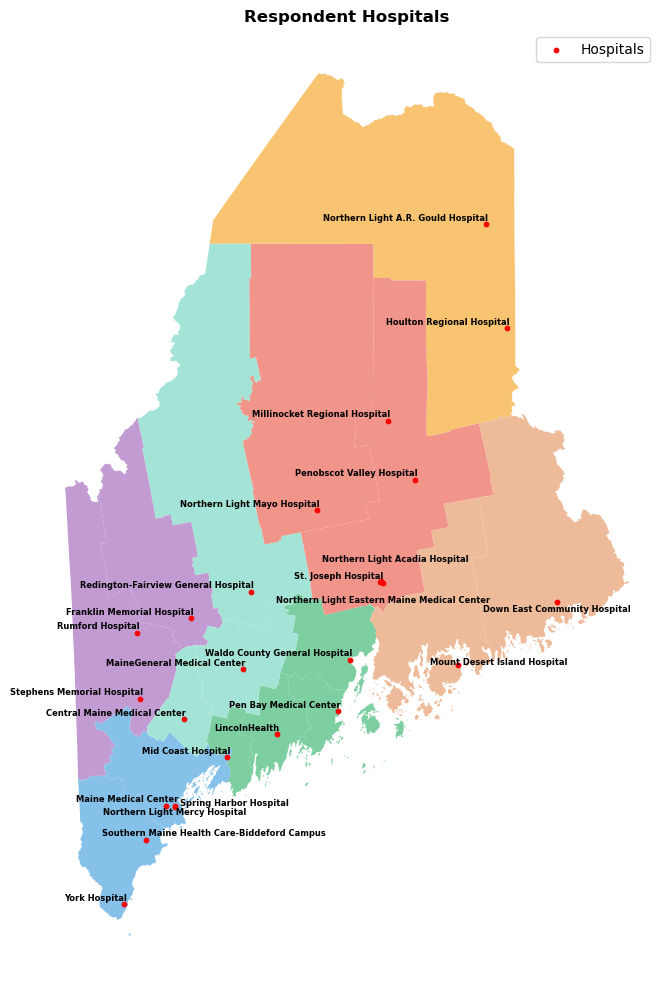

In [344]:
# Reproject hospital_gdf to match the CRS of maine_counties
hospital_gdf = hospital_gdf.to_crs(maine_counties.crs)

# Plot the regions
fig, ax = plt.subplots(figsize=(8, 13))
maine_counties.plot(column='region', 
                    color=maine_counties["color"],  
                    legend=True,   
                    ax=ax)

# Overlay the hospitals locations
hospital_gdf.plot(ax=ax, color='red', marker='o', label='Hospitals', markersize= 10)

# Add hospital names; adjusting alignment
for x, y, label in zip(hospital_gdf.geometry.x, hospital_gdf.geometry.y, hospital_gdf['hospital_name']):

    if label == "Northern Light Acadia Hospital":
        ax.text(x + 0.1, y + 0.1, label, fontsize=6, weight="bold", ha='center', color='black')  # Slightly shift to the right and up
        
    elif label == "Northern Light Eastern Maine Medical Center":
        ax.text(x, y - 0.1, label, fontsize=6, weight="bold", ha='center', color='black')  # Shift down

    elif label == "Down East Community Hospital":
        ax.text(x, y - 0.05, label, fontsize=6, weight="bold", ha='center', color='black')  # Shift slightly down

    elif label == "Northern Light Mercy Hospital":
        ax.text(x, y - 0.04, label, fontsize=6, weight="bold", ha='center', color='black')  # Shift slightly down

    elif label == "Spring Harbor Hospital":
        ax.text(x + 0.5, y, label, fontsize=6, weight="bold", ha='center', color='black')  # Shift slightly right

    elif label == "Mount Desert Island Hospital":
        ax.text(x + 0.3, y, label, fontsize=6, weight="bold", ha='center', color='black')  # Shift slightly right

    elif label == "Southern Maine Health Care-Biddeford Campus":
        print("HERE")
        ax.text(x + 0.5, y + 0.02, label, fontsize=6, weight="bold", ha='center', color='black')  # Shift slightly right                                     
    else:       
        ax.text(x + 0.02, y + 0.02, label, fontsize=6, weight="bold", ha='right', color='black')

# Legend and title
plt.title("Respondent Hospitals", weight="bold")
ax.legend()
ax.axis("off")
fig.savefig("../figs/hospital_locations.png", dpi = 300, bbox_inches="tight")
plt.show();

### Map the Hospitals to Counties

In [260]:
# Maps the hospitals to their respective counties based on the lat and long
mapped_hospitals = gpd.sjoin(hospital_gdf, maine_counties, how = "left", predicate = "within")

In [261]:
mapped_hospitals[mapped_hospitals["hospital_name"] == "Waldo County General Hospital"]

,hospital_name,lat,long,geometry,index_right,STATEFP,COUNTYFP,COUNTYNS,GEOIDFQ,GEOID,county,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,region,color
6,Waldo County General Hospital,44.412666,-68.993824,POINT (-68.99382 44.41267),432,23,027,00581299,0500000US23027,23027,Waldo,Waldo County,ME,Maine,06,1890642742,317988397,4,#7dcea0


In [262]:
mapped_hospitals.head()

,hospital_name,lat,long,geometry,index_right,STATEFP,COUNTYFP,COUNTYNS,GEOIDFQ,GEOID,county,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,region,color
0,Central Maine Medical Center,44.102600,-70.214693,POINT (-70.21469 44.10260),2626,23,001,00581286,0500000US23001,23001,Androscoggin,Androscoggin County,ME,Maine,06,1211995418,75541705,3,#a3e4d7
1,Penobscot Valley Hospital,45.347570,-68.517546,POINT (-68.51755 45.34757),1925,23,019,00581295,0500000US23019,23019,Penobscot,Penobscot County,ME,Maine,06,8798661091,414021728,6,#f1948a
2,Franklin Memorial Hospital,44.626380,-70.162782,POINT (-70.16278 44.62638),911,23,007,00581289,0500000US23007,23007,Franklin,Franklin County,ME,Maine,06,4395226704,121284631,2,#c39bd3
3,Northern Light Mayo Hospital,45.187687,-69.237320,POINT (-69.23732 45.18769),541,23,021,00581296,0500000US23021,23021,Piscataquis,Piscataquis County,ME,Maine,06,10258545867,1080517302,6,#f1948a
4,Rumford Hospital,44.551829,-70.556196,POINT (-70.55620 44.55183),52,23,017,00581294,0500000US23017,23017,Oxford,Oxford County,ME,Maine,06,5379294383,255884970,2,#c39bd3


In [263]:
mapped_hospitals.rename(columns = {"NAME": "county"}, inplace = True)

In [264]:
hospital_counties_and_region = mapped_hospitals[["hospital_name", "county", "region"]]

In [265]:
hospital_counties_and_region

,hospital_name,county,region
0,Central Maine Medical Center,Androscoggin,3
1,Penobscot Valley Hospital,Penobscot,6
2,Franklin Memorial Hospital,Franklin,2
3,Northern Light Mayo Hospital,Piscataquis,6
4,Rumford Hospital,Oxford,2
5,Millinocket Regional Hospital,Penobscot,6
6,Waldo County General Hospital,Waldo,4
7,York Hospital,York,1
8,Northern Light Mercy Hospital,Cumberland,1
9,Mid Coast Hospital,Cumberland,1


In [266]:
num_hospitals_reporting = len(hospital_counties_and_region)

___
### Filter Response Data & Generate Grouped DF

In this section we can make some groupings and generate choropleths by region and by county.
The function below can make choropleths with data grouped by region and by county.

In [267]:
def generate_grouped_choropleth(grouped_df:pd.DataFrame, county_gis_df:pd.DataFrame, grouping_col:str, dissolve_flag:bool = False, setting_df:pd.DataFrame = None, 
                                num_reporting:int = None, title:str = None, save_path:str = None) -> None:
    """
    Genreates a choropleth using a grouped dataframe. 
    """
    # Get the grand total
    grand_total = int(grouped_df.sum())

    # Convert grouping_col to string; regions are currently ints
    maine_counties[grouping_col] = maine_counties[grouping_col].astype(str)
    grouped_df.index = grouped_df.index.astype(str)

    # Merge grouped_df and GIS df
    map_data = county_gis_df.merge(grouped_df, on = grouping_col, how = "left")

    # Genreate Choropleth
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    fig.suptitle(title, weight = "bold", fontsize = 16, y = 1.05)
    map_data.plot(column="total", cmap = "Greens", linewidth = 0.8, ax = ax, edgecolor = "0.8", legend = False, alpha = 0.7)

    # If the dissolve flag is true, we generate new borders by region
    if dissolve_flag:

        # This changes the borders from county to region; the agg function makes it keep only one of the values,
        # rather than a sum. Since grouped_df already contains region totals, this is accurate.
        region_geometries = map_data.dissolve(by='region', aggfunc = {'total': 'first'})

        # Display totals in the center of the region
        for idx, row in region_geometries.iterrows():
            if not pd.isna(row['total']):  

                # Get the center of the region
                centroid = row['geometry'].centroid
                x, y = centroid.x, centroid.y
                ax.text(
                    x, y,
                    f"{int(row['total'])}",
                    ha="center", fontsize=10, color = "black", weight="bold"
                )                               
    # When the dissolve flag is false, we are grouping by county and keep the original boundaries.
    else:
        for idx, row in map_data.iterrows():
            if not pd.isna(row['total']):  

                # Get the center of the county
                centroid = row['geometry'].centroid
                x, y = centroid.x, centroid.y
                ax.text(
                    x, y,
                    f"{int(row['total'])}",
                    ha="center", fontsize=10, color="black", weight="bold"
                )      
    # Add the grand total to the bottom
    fig.text(
                0.5, 0.99,
                f"Number of Hospitals Reporting: {num_reporting}",
                ha = "center", 
                fontsize = 12, 
                color="black", 
                weight="bold"
            )
    
        # Add the grand total to the bottom
    fig.text(
                0.5, 0.95,
                f"Statewide Total: {int(grand_total)}",
                ha = "center", 
                fontsize = 12, 
                color="red", 
                weight="bold"
            )
    if setting_df is not None:

        norm = mcolors.Normalize(vmin=setting_df["count"].min(), vmax=setting_df["count"].max())
        cmap = plt.colormaps["Greens"]  # Use the modern way to get colormap
        colors = cmap(norm(setting_df["count"]))

        plt.subplots_adjust(bottom=0.2)
        ax2 = fig.add_axes([0.5, 0.07, 0.20, 0.1])  
        ax2.set_title("Totals by Destination", weight = "bold", style = "italic")
        bars = ax2.barh(setting_df.index, setting_df["count"], color = colors, alpha = 0.7)
        
        # Annotate bars
        for bar in bars:
            width = bar.get_width()  # Get the width of the bar
            y = bar.get_y() + bar.get_height() / 2  # Get the center of the bar
            ax2.text(
                width + 1, y,  # Position 
                f"{int(width)}",  # Annotation 
                va="center", ha="left", fontsize=10, fontweight="bold"
            )
        ax2.set_xticks([])
        ax2.tick_params(axis='y', length=0)
        plt.setp(ax2.get_yticklabels(), fontweight="bold")

    # Add title
    #ax.set_title(title, weight = "bold", fontsize = 16)
    ax.axis("off")
    plt.tight_layout()
    fig.savefig(save_path, dpi = 300, bbox_inches="tight")


### Filter for Question # 1

In [268]:
response_data_full.iloc[0:5, 12:16]

,Total number of patients awaiting discharge to the following settings: Skilled Nursing Facility (SNF):,Total number of patients awaiting discharge to the following settings: Long Term Care Hospital (LTC):,Total number of patients awaiting discharge to the following settings: Residential Care Facility (RCF):,Total number of patients awaiting discharge to the following settings: Home Health:
0,3.0,3.0,1.0,5.0
1,0.0,0.0,0.0,1.0
2,NaN,2.0,1.0,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [269]:
snf_col = "Total number of patients awaiting discharge to the following settings: Skilled Nursing Facility (SNF):"
ltc_col = "Total number of patients awaiting discharge to the following settings: Long Term Care Hospital (LTC):"
rcf_col = "Total number of patients awaiting discharge to the following settings: Residential Care Facility (RCF):"
hh_col = "Total number of patients awaiting discharge to the following settings: Home Health:"

In [270]:
# Filter for question # 1 ~ Totals
question_1_responses = response_data_full.loc[:, ["hospital_name", snf_col, ltc_col, rcf_col, hh_col]]
question_1_responses

,hospital_name,Total number of patients awaiting discharge to the following settings: Skilled Nursing Facility (SNF):,Total number of patients awaiting discharge to the following settings: Long Term Care Hospital (LTC):,Total number of patients awaiting discharge to the following settings: Residential Care Facility (RCF):,Total number of patients awaiting discharge to the following settings: Home Health:
0,Central Maine Medical Center,3.0,3.0,1.0,5.0
1,Penobscot Valley Hospital,0.0,0.0,0.0,1.0
2,Franklin Memorial Hospital,NaN,2.0,1.0,NaN
3,Northern Light Mayo Hospital,NaN,NaN,NaN,NaN
4,Rumford Hospital,NaN,NaN,NaN,NaN
5,Millinocket Regional Hospital,1.0,0.0,0.0,3.0
6,Northern Light Acadia Hospital,NaN,NaN,NaN,NaN
7,Pen Bay Medical Center,4.0,5.0,4.0,2.0
8,Waldo County General Hospital,3.0,3.0,1.0,2.0
9,York Hospital,3.0,1.0,0.0,0.0


In [271]:
question_1_responses["total"] = question_1_responses.iloc[:, 1:5].sum(axis = 1, skipna = True)

In [272]:
settings_totals = question_1_responses.sum(axis = 0)

In [273]:
settings_totals

hospital_name                                                                                              Central Maine Medical CenterPenobscot Valley H...
Total number of patients awaiting discharge to the following settings: Skilled Nursing Facility (SNF):                                                 108.0
Total number of patients awaiting discharge to the following settings: Long Term Care Hospital (LTC):                                                   78.0
Total number of patients awaiting discharge to the following settings: Residential Care Facility (RCF):                                                 38.0
Total number of patients awaiting discharge to the following settings: Home Health:                                                                     74.0
total                                                                                                                                                  298.0
dtype: object

In [274]:
setting_df = pd.DataFrame(settings_totals).loc[[snf_col, ltc_col, rcf_col, hh_col], :]

In [275]:
setting_df.index = ["SNF", "LTF", "RCF", "HH"]

In [276]:
setting_df.rename(columns = {0:"count"}, inplace = True)

In [277]:
setting_df

,count
SNF,108.0
LTF,78.0
RCF,38.0
HH,74.0


In [278]:
setting_df["count"] = pd.to_numeric(setting_df["count"], errors="coerce")


In [279]:
question_1_responses = question_1_responses[["hospital_name", "total"]]

In [280]:
question_1_responses_with_counties = question_1_responses.merge(hospital_counties_and_region, left_on = "hospital_name", right_on = "hospital_name")

In [281]:
question_1_responses_with_counties.rename(columns = {"NAME": "county"}, inplace = True)

### Group Question # 1 by Region

In [282]:
grouped_by_region_df = question_1_responses_with_counties.groupby("region")["total"].sum()
grouped_by_region_df

region
1    118.0
2      3.0
3     40.0
4     27.0
5      9.0
6     91.0
7     10.0
Name: total, dtype: float64

/var/folders/jw/62ly49f15zj22rm_89qjsv940000gn/T/ipykernel_40247/3198133947.py:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


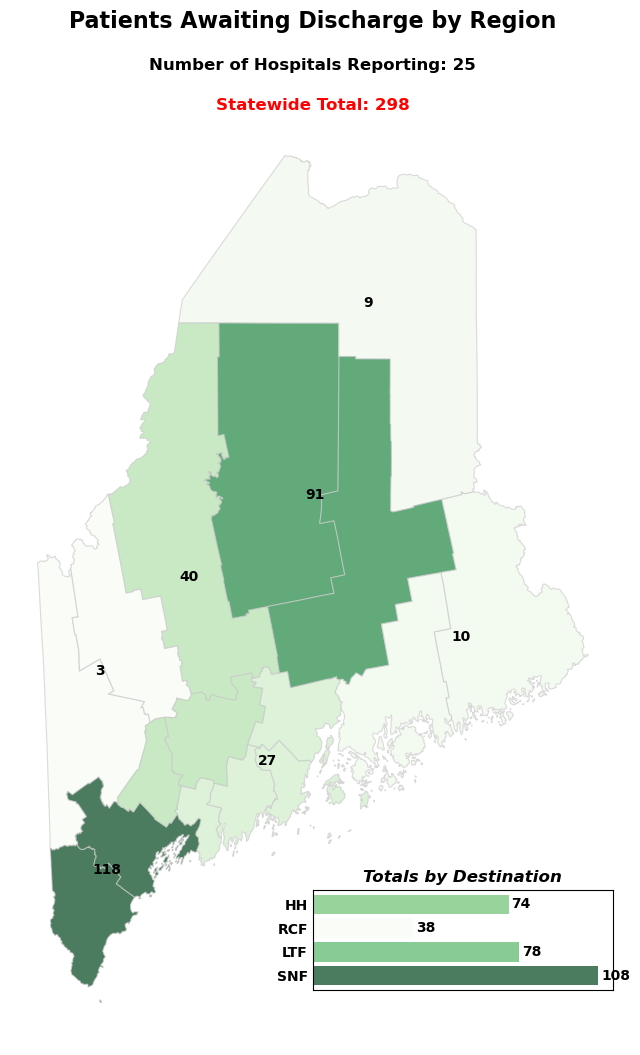

In [283]:
fig_title = "Patients Awaiting Discharge by Region"
save_path = "../figs/patients_awaiting_discharge_region.png"
generate_grouped_choropleth(grouped_by_region_df, maine_counties, "region", True, setting_df, num_hospitals_reporting, fig_title, save_path)

### Group Question # 1 by County

In [311]:
grouped_by_region_df = question_1_responses_with_counties.groupby("county")["total"].sum()
grouped_by_region_df

county
Androscoggin     12.0
Aroostook         9.0
Cumberland      114.0
Franklin          3.0
Hancock           5.0
Kennebec         22.0
Knox             15.0
Lincoln           3.0
Oxford            0.0
Penobscot        91.0
Piscataquis       0.0
Somerset          6.0
Waldo             9.0
Washington        5.0
York              4.0
Name: total, dtype: float64

/var/folders/jw/62ly49f15zj22rm_89qjsv940000gn/T/ipykernel_40247/3198133947.py:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


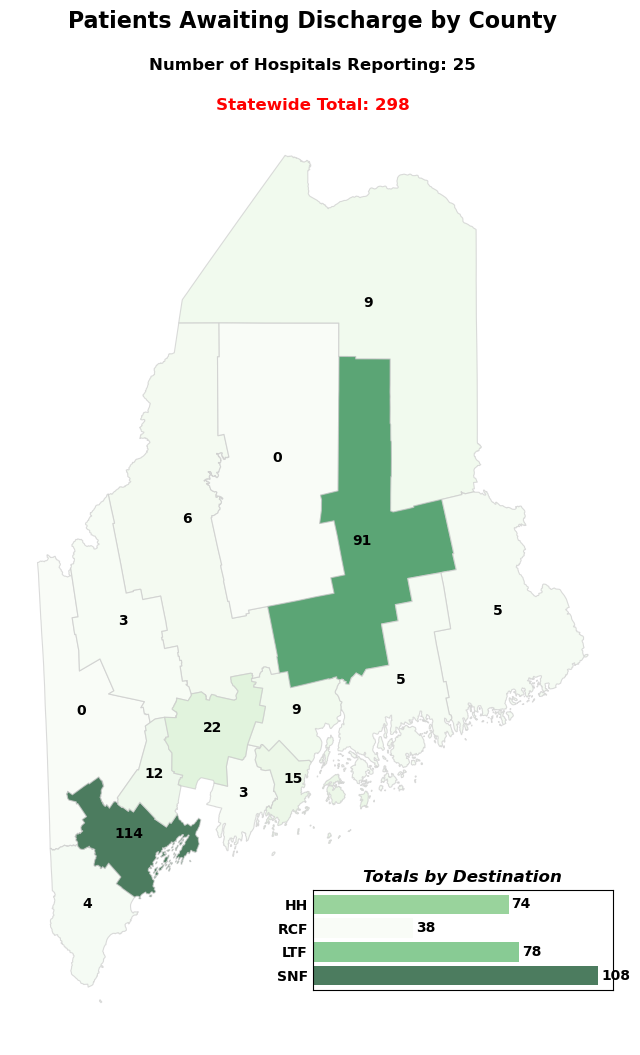

In [312]:
fig_title = "Patients Awaiting Discharge by County"
save_path = "../figs/patients_awaiting_discharge_county.png"
generate_grouped_choropleth(grouped_by_region_df, maine_counties, "county", False, setting_df, num_hospitals_reporting, fig_title, save_path)

In [314]:
question_1_responses

,hospital_name,total
0,Central Maine Medical Center,12.0
1,Penobscot Valley Hospital,1.0
2,Franklin Memorial Hospital,3.0
3,Northern Light Mayo Hospital,0.0
4,Rumford Hospital,0.0
5,Millinocket Regional Hospital,4.0
6,Northern Light Acadia Hospital,0.0
7,Pen Bay Medical Center,15.0
8,Waldo County General Hospital,9.0
9,York Hospital,4.0


In [315]:
hospital_gdf = mapped_hospitals.merge(question_1_responses, left_on = "hospital_name", right_on = "hospital_name")

/var/folders/jw/62ly49f15zj22rm_89qjsv940000gn/T/ipykernel_40247/2757317457.py:14: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  maine_counties.plot(


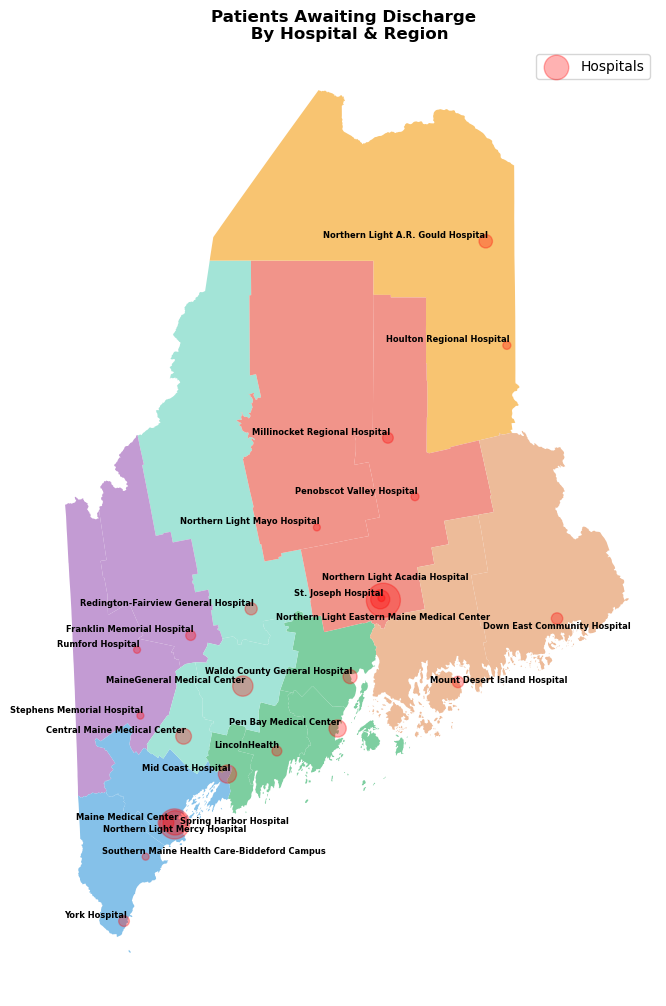

In [318]:
# Reproject hospital_gdf to match the CRS of maine_counties
hospital_gdf = hospital_gdf.to_crs(maine_counties.crs)

# Normalize the marker size column for consistent scaling
size_min, size_max = 25, 600  # Minimum and maximum marker sizes; this is kinda arbitrary
hospital_gdf["scaled_size"] = (
    (hospital_gdf["total"] - hospital_gdf["total"].min())
    / (hospital_gdf["total"].max() - hospital_gdf["total"].min())
    * (size_max - size_min) + size_min
)

# Plot the regions
fig, ax = plt.subplots(figsize=(8, 13))
maine_counties.plot(
    column='region', 
    color=maine_counties["color"],  
    legend=True,   
    ax=ax
)

# Overlay the hospital locations with semi-transparent markers and variable sizes
hospital_gdf.plot(
    ax=ax, 
    color='red', 
    marker='o', 
    label='Hospitals', 
    markersize=hospital_gdf["scaled_size"], 
    alpha=0.3  
)

# Add hospital names; adjusting alignment
for x, y, label in zip(hospital_gdf.geometry.x, hospital_gdf.geometry.y, hospital_gdf['hospital_name']):

    if label == "Northern Light Acadia Hospital":
        ax.text(x + 0.1, y + 0.1, label, fontsize=6, weight="bold", ha='center', color='black')  # Slightly shift to the right and up
        
    elif label == "Northern Light Eastern Maine Medical Center":
        ax.text(x, y - 0.1, label, fontsize=6, weight="bold", ha='center', color='black')  # Shift down

    elif label == "Down East Community Hospital":
        ax.text(x, y - 0.05, label, fontsize=6, weight="bold", ha='center', color='black')  # Shift slightly down

    elif label == "Northern Light Mercy Hospital":
        ax.text(x, y - 0.04, label, fontsize=6, weight="bold", ha='center', color='black')  # Shift slightly down

    elif label == "Spring Harbor Hospital":
        ax.text(x + 0.5, y, label, fontsize=6, weight="bold", ha='center', color='black')  # Shift slightly right

    elif label == "Mount Desert Island Hospital":
        ax.text(x + 0.3, y, label, fontsize=6, weight="bold", ha='center', color='black')  # Shift slightly right

    elif label == "Southern Maine Health Care-Biddeford Campus":
        ax.text(x + 0.5, y + 0.02, label, fontsize=6, weight="bold", ha='center', color='black')  # Shift slightly right                                     
    else:       
        ax.text(x + 0.02, y + 0.02, label, fontsize=6, weight="bold", ha='right', color='black')

# Legend and title
plt.title("Patients Awaiting Discharge \n By Hospital & Region", weight="bold")
ax.legend()
ax.axis("off")
fig.savefig("../figs/pad_by_region_and_hospital.png", dpi = 300, bbox_inches="tight")
plt.show()


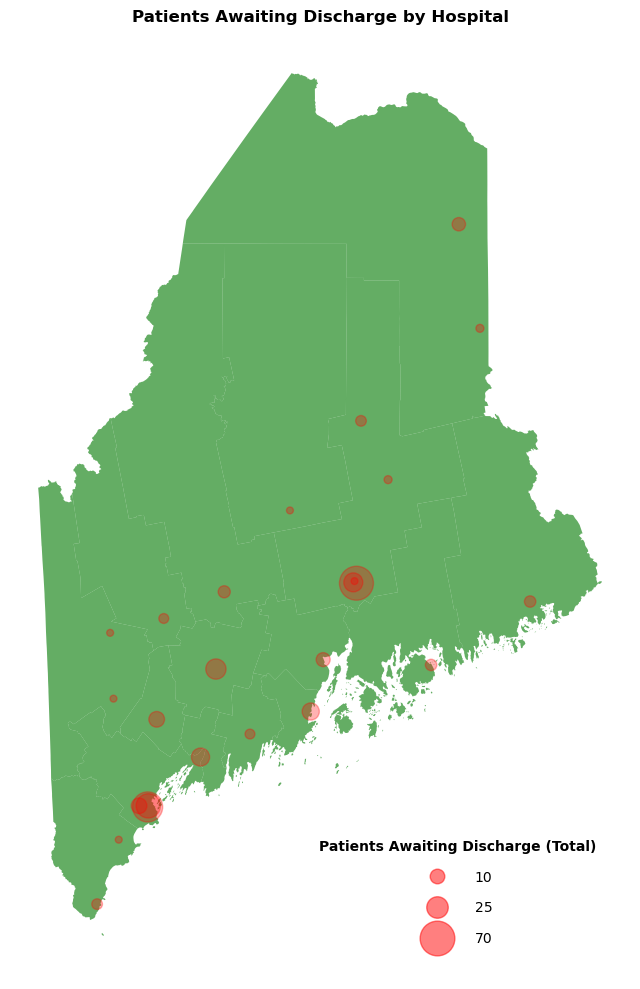

In [319]:
# Reproject hospital_gdf to match the CRS of maine_counties
hospital_gdf = hospital_gdf.to_crs(maine_counties.crs)

# Normalize the marker size column for consistent scaling
size_min, size_max = 25, 600  # Minimum and maximum marker sizes
hospital_gdf["scaled_size"] = (
    (hospital_gdf["total"] - hospital_gdf["total"].min())
    / (hospital_gdf["total"].max() - hospital_gdf["total"].min())
    * (size_max - size_min) + size_min
)

# Plot the regions
fig, ax = plt.subplots(figsize=(8, 13))
maine_counties.plot(ax=ax, color="forestgreen", alpha=0.7)

# Overlay the hospital locations with semi-transparent markers and variable sizes
hospital_gdf.plot(
    ax=ax,
    color='red',
    marker='o',
    markersize=hospital_gdf["scaled_size"],
    alpha=0.3
)

# Add a custom legend for dot sizes
reference_totals = [10, 25, 70]  # Example hospital "total" values
reference_sizes = [
    (total - hospital_gdf["total"].min())
    / (hospital_gdf["total"].max() - hospital_gdf["total"].min())
    * (size_max - size_min) + size_min
    for total in reference_totals
]

# Create legend handles with adjusted sizes for the legend box
handles = [
    mlines.Line2D([], [], color='red', marker='o', linestyle='None',
                  markersize=size**0.5, alpha=0.5, label=f'{total}')
    for total, size in zip(reference_totals, reference_sizes)
]

# Add the legend
legend = ax.legend(
    handles=handles, 
    title="Patients Awaiting Discharge (Total)", 
    loc='lower right', 
    frameon=False, 
    borderpad=1.9,  # Increase padding inside the legend box
    labelspacing=1.2,  # Increase space between labels
    handletextpad=1.7,  # Increase space between markers and text
    fontsize=10  # Adjust font size for better fit
)

# Set the legend title to bold
legend.get_title().set_fontweight("bold")

# Title and axis adjustments
plt.title("Patients Awaiting Discharge by Hospital", weight="bold")
ax.axis("off")
fig.savefig("../figs/pad_by_hospital.png", dpi = 300, bbox_inches="tight")
plt.show()

### Filter for Emergency Department Questions

In [320]:
# Filter for emergency department questions
emergency_data = response_data_full.iloc[:, 96:107].copy()
emergency_data["hospital_name"] = response_data_full["hospital_name"]

# Move hosptial name to the front; fuck it why not
columns = list(emergency_data.columns)
last_col = columns[-1] 
new_order = [last_col] + columns[:-1]  # Reorder columns
emergency_data = emergency_data[new_order]

# Display the resulting DataFrame
emergency_data

,hospital_name,How many licensed ED beds are in your hospital? Open-Ended Response,How many of your licensed ED beds are staffed in your hospital? Open-Ended Response,How many patients are currently in your ED? Open-Ended Response,"Of those patients reported in question 3, how many are age 17 or younger? Open-Ended Response","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: 48 hours","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: >48 hours but less than one week","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: 7 to 14 days","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: 15 to 30 days","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: 31 to 60 days","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: 61 to 120 days","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: >3 months"
0,Central Maine Medical Center,48.0,36.0,24.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Penobscot Valley Hospital,6.0,6.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Franklin Memorial Hospital,NaN,8.0,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Northern Light Mayo Hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rumford Hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Millinocket Regional Hospital,5.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Northern Light Acadia Hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Pen Bay Medical Center,23.0,23.0,36.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8,Waldo County General Hospital,16.0,16.0,20.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,York Hospital,13.0,13.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [321]:
emergency_data = emergency_data.merge(hospital_counties_and_region, left_on = "hospital_name", right_on = "hospital_name")

In [322]:
emergency_data

,hospital_name,How many licensed ED beds are in your hospital? Open-Ended Response,How many of your licensed ED beds are staffed in your hospital? Open-Ended Response,How many patients are currently in your ED? Open-Ended Response,"Of those patients reported in question 3, how many are age 17 or younger? Open-Ended Response","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: 48 hours","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: >48 hours but less than one week","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: 7 to 14 days","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: 15 to 30 days","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: 31 to 60 days","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: 61 to 120 days","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: >3 months",county,region
0,Central Maine Medical Center,48.0,36.0,24.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Androscoggin,3
1,Penobscot Valley Hospital,6.0,6.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Penobscot,6
2,Franklin Memorial Hospital,NaN,8.0,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Franklin,2
3,Northern Light Mayo Hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Piscataquis,6
4,Rumford Hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oxford,2
5,Millinocket Regional Hospital,5.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Penobscot,6
6,Northern Light Acadia Hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Penobscot,6
7,Pen Bay Medical Center,23.0,23.0,36.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Knox,4
8,Waldo County General Hospital,16.0,16.0,20.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Waldo,4
9,York Hospital,13.0,13.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,York,1


In [323]:
col_1 = "How many licensed ED beds are in your hospital? Open-Ended Response"
col_2 = "How many of your licensed ED beds are staffed in your hospital? Open-Ended Response"
col_3 = "How many patients are currently in your ED? Open-Ended Response"
grouping_col = "region" 
grouped_df = emergency_data.groupby(grouping_col)[[col_1, col_2, col_3]].sum().reset_index()

In [324]:
grouped_df

,region,How many licensed ED beds are in your hospital? Open-Ended Response,How many of your licensed ED beds are staffed in your hospital? Open-Ended Response,How many patients are currently in your ED? Open-Ended Response
0,1,182.0,116.0,131.0
1,2,0.0,8.0,8.0
2,3,108.0,96.0,86.0
3,4,39.0,39.0,56.0
4,5,21.0,21.0,14.0
5,6,43.0,43.0,55.0
6,7,18.0,18.0,16.0


In [325]:
maine_counties

,STATEFP,COUNTYFP,COUNTYNS,GEOIDFQ,GEOID,county,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry,region,color
51,23,015,00581293,0500000US23015,23015,Lincoln,Lincoln County,ME,Maine,06,1180688993,631299424,"MULTIPOLYGON (((-69.32357 43.75899, -69.32114 ...",4,#7dcea0
52,23,017,00581294,0500000US23017,23017,Oxford,Oxford County,ME,Maine,06,5379294383,255884970,"POLYGON ((-71.08000 45.30699, -71.07841 45.306...",2,#c39bd3
195,23,023,00581297,0500000US23023,23023,Sagadahoc,Sagadahoc County,ME,Maine,06,657801805,300571247,"MULTIPOLYGON (((-69.76031 43.71044, -69.75904 ...",4,#7dcea0
432,23,027,00581299,0500000US23027,23027,Waldo,Waldo County,ME,Maine,06,1890642742,317988397,"MULTIPOLYGON (((-68.94229 44.28436, -68.94063 ...",4,#7dcea0
435,23,025,00581298,0500000US23025,23025,Somerset,Somerset County,ME,Maine,06,10163811939,437942552,"POLYGON ((-70.55279 45.66784, -70.54730 45.666...",3,#a3e4d7
541,23,021,00581296,0500000US23021,23021,Piscataquis,Piscataquis County,ME,Maine,06,10258545867,1080517302,"POLYGON ((-69.83118 45.73860, -69.82943 45.738...",6,#f1948a
710,23,031,00581301,0500000US23031,23031,York,York County,ME,Maine,06,2567186511,721352437,"MULTIPOLYGON (((-70.61725 42.99202, -70.61467 ...",1,#85c1e9
911,23,007,00581289,0500000US23007,23007,Franklin,Franklin County,ME,Maine,06,4395226704,121284631,"POLYGON ((-70.83554 45.29380, -70.82755 45.296...",2,#c39bd3
1287,23,003,00581287,0500000US23003,23003,Aroostook,Aroostook County,ME,Maine,06,17278162809,405078327,"POLYGON ((-70.01975 46.59217, -69.99709 46.695...",5,#f8c471
1925,23,019,00581295,0500000US23019,23019,Penobscot,Penobscot County,ME,Maine,06,8798661091,414021728,"POLYGON ((-69.35567 45.07347, -69.24996 45.087...",6,#f1948a


In [326]:
hospital_gdf = mapped_hospitals.merge(emergency_data, left_on = "hospital_name", right_on = "hospital_name")

In [327]:
# Convert grouping_col to string; regions are currently ints
maine_counties[grouping_col] = maine_counties[grouping_col].astype(str)
grouped_df[grouping_col] = grouped_df[grouping_col].astype(str)

# Merge grouped_df and GIS df
map_data = maine_counties.merge(grouped_df, on = grouping_col, how = "left")

In [328]:
map_data

,STATEFP,COUNTYFP,COUNTYNS,GEOIDFQ,GEOID,county,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry,region,color,How many licensed ED beds are in your hospital? Open-Ended Response,How many of your licensed ED beds are staffed in your hospital? Open-Ended Response,How many patients are currently in your ED? Open-Ended Response
0,23,015,00581293,0500000US23015,23015,Lincoln,Lincoln County,ME,Maine,06,1180688993,631299424,"MULTIPOLYGON (((-69.32357 43.75899, -69.32114 ...",4,#7dcea0,39.0,39.0,56.0
1,23,017,00581294,0500000US23017,23017,Oxford,Oxford County,ME,Maine,06,5379294383,255884970,"POLYGON ((-71.08000 45.30699, -71.07841 45.306...",2,#c39bd3,0.0,8.0,8.0
2,23,023,00581297,0500000US23023,23023,Sagadahoc,Sagadahoc County,ME,Maine,06,657801805,300571247,"MULTIPOLYGON (((-69.76031 43.71044, -69.75904 ...",4,#7dcea0,39.0,39.0,56.0
3,23,027,00581299,0500000US23027,23027,Waldo,Waldo County,ME,Maine,06,1890642742,317988397,"MULTIPOLYGON (((-68.94229 44.28436, -68.94063 ...",4,#7dcea0,39.0,39.0,56.0
4,23,025,00581298,0500000US23025,23025,Somerset,Somerset County,ME,Maine,06,10163811939,437942552,"POLYGON ((-70.55279 45.66784, -70.54730 45.666...",3,#a3e4d7,108.0,96.0,86.0
5,23,021,00581296,0500000US23021,23021,Piscataquis,Piscataquis County,ME,Maine,06,10258545867,1080517302,"POLYGON ((-69.83118 45.73860, -69.82943 45.738...",6,#f1948a,43.0,43.0,55.0
6,23,031,00581301,0500000US23031,23031,York,York County,ME,Maine,06,2567186511,721352437,"MULTIPOLYGON (((-70.61725 42.99202, -70.61467 ...",1,#85c1e9,182.0,116.0,131.0
7,23,007,00581289,0500000US23007,23007,Franklin,Franklin County,ME,Maine,06,4395226704,121284631,"POLYGON ((-70.83554 45.29380, -70.82755 45.296...",2,#c39bd3,0.0,8.0,8.0
8,23,003,00581287,0500000US23003,23003,Aroostook,Aroostook County,ME,Maine,06,17278162809,405078327,"POLYGON ((-70.01975 46.59217, -69.99709 46.695...",5,#f8c471,21.0,21.0,14.0
9,23,019,00581295,0500000US23019,23019,Penobscot,Penobscot County,ME,Maine,06,8798661091,414021728,"POLYGON ((-69.35567 45.07347, -69.24996 45.087...",6,#f1948a,43.0,43.0,55.0


In [329]:
map_data.dissolve(by='region')

,geometry,STATEFP,COUNTYFP,COUNTYNS,GEOIDFQ,GEOID,county,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,color,How many licensed ED beds are in your hospital? Open-Ended Response,How many of your licensed ED beds are staffed in your hospital? Open-Ended Response,How many patients are currently in your ED? Open-Ended Response
region,,,,,,,,,,,,,,,,,
1,"MULTIPOLYGON (((-70.60135 42.98108, -70.60783 ...",23,031,00581301,0500000US23031,23031,York,York County,ME,Maine,06,2567186511,721352437,#85c1e9,182.0,116.0,131.0
2,"POLYGON ((-71.07841 45.30623, -71.07374 45.307...",23,017,00581294,0500000US23017,23017,Oxford,Oxford County,ME,Maine,06,5379294383,255884970,#c39bd3,0.0,8.0,8.0
3,"POLYGON ((-70.47562 44.06994, -70.47206 44.073...",23,025,00581298,0500000US23025,23025,Somerset,Somerset County,ME,Maine,06,10163811939,437942552,#a3e4d7,108.0,96.0,86.0
4,"MULTIPOLYGON (((-69.76031 43.71044, -69.75904 ...",23,015,00581293,0500000US23015,23015,Lincoln,Lincoln County,ME,Maine,06,1180688993,631299424,#7dcea0,39.0,39.0,56.0
5,"POLYGON ((-70.01975 46.59217, -69.99709 46.695...",23,003,00581287,0500000US23003,23003,Aroostook,Aroostook County,ME,Maine,06,17278162809,405078327,#f8c471,21.0,21.0,14.0
6,"POLYGON ((-68.75203 46.39560, -68.74733 46.395...",23,021,00581296,0500000US23021,23021,Piscataquis,Piscataquis County,ME,Maine,06,10258545867,1080517302,#f1948a,43.0,43.0,55.0
7,"MULTIPOLYGON (((-68.47273 44.10296, -68.46978 ...",23,029,00581300,0500000US23029,23029,Washington,Washington County,ME,Maine,06,6637427367,1799648496,#edbb99,18.0,18.0,16.0


/var/folders/jw/62ly49f15zj22rm_89qjsv940000gn/T/ipykernel_40247/1794753098.py:3: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  maine_counties.plot(column='region',


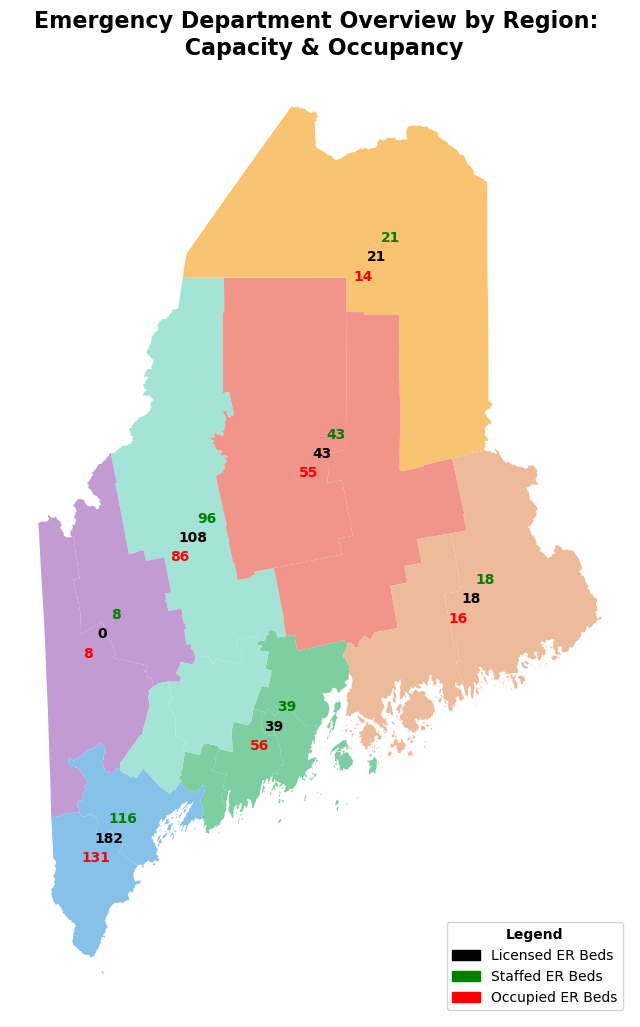

In [346]:
# Plot the regions
fig, ax = plt.subplots(figsize=(8, 13))
maine_counties.plot(column='region', 
                    color=maine_counties["color"],  
                    legend=True,   
                    ax=ax)

region_geometries = map_data.dissolve(by='region')

# fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# map_data.plot(column=col_1, cmap = "Greens", linewidth = 0.8, ax = ax, edgecolor = "0.8", legend = False, alpha = 0.7)
# Display totals in the center of the region
for idx, row in region_geometries.iterrows():
    if not pd.isna(row[col_1]):  

        # Get the center of the region
        centroid = row['geometry'].centroid
        x, y = centroid.x, centroid.y
        ax.text(
            x, y,
            f"{int(row[col_1])}",
            ha="center", fontsize=10, color = "black", weight="bold"
        )
        ax.text(
            x + .1, y + .1,
            f"{int(row[col_2])}",
            ha="center", fontsize=10, color = "green", weight="bold"
        )
        ax.text(
            x - .1, y - .1,
            f"{int(row[col_3])}",
            ha="center", fontsize=10, color = "red", weight="bold"
        )         

# Create custom legend handles for text colors
legend_handles = [
    mpatches.Patch(color='black', label='Licensed ER Beds'),
    mpatches.Patch(color='green', label='Staffed ER Beds'),
    mpatches.Patch(color='red', label='Occupied ER Beds')
]

# Add the legend for text colors
legend = plt.legend(
    handles=legend_handles,
    title="Legend",
    loc="lower right"
)

# Set the legend title to bold
legend.get_title().set_fontweight("bold")

plt.title("Emergency Department Overview by Region: \n Capacity & Occupancy", weight = "bold", fontsize = 16)
ax.axis("off")

fig.savefig("../figs/emergency_dept_overview.png", dpi = 300, bbox_inches="tight")
# Show the plot
plt.show();

In [331]:
total_under_17 = "Of those patients reported in question 3, how many are age 17 or younger? Open-Ended Response"
more_than_48 = "Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: 48 hours"	
more_48_less_7d = "Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: >48 hours but less than one week"	
seven_to_14 = "Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: 7 to 14 days"	
fifteen_to_30 = "Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: 15 to 30 days"	 
month_to_60d = "Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: 31 to 60 days" 
sixty_days_to_120 = "Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: 61 to 120 days" 
greater_3m = "Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: >3 months"

In [332]:
cols_of_interest = [more_than_48, more_48_less_7d, seven_to_14, fifteen_to_30, month_to_60d, sixty_days_to_120, greater_3m]

In [333]:
emergency_data

,hospital_name,How many licensed ED beds are in your hospital? Open-Ended Response,How many of your licensed ED beds are staffed in your hospital? Open-Ended Response,How many patients are currently in your ED? Open-Ended Response,"Of those patients reported in question 3, how many are age 17 or younger? Open-Ended Response","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: 48 hours","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: >48 hours but less than one week","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: 7 to 14 days","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: 15 to 30 days","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: 31 to 60 days","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: 61 to 120 days","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: >3 months",county,region
0,Central Maine Medical Center,48.0,36.0,24.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Androscoggin,3
1,Penobscot Valley Hospital,6.0,6.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Penobscot,6
2,Franklin Memorial Hospital,NaN,8.0,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Franklin,2
3,Northern Light Mayo Hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Piscataquis,6
4,Rumford Hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oxford,2
5,Millinocket Regional Hospital,5.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Penobscot,6
6,Northern Light Acadia Hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Penobscot,6
7,Pen Bay Medical Center,23.0,23.0,36.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Knox,4
8,Waldo County General Hospital,16.0,16.0,20.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Waldo,4
9,York Hospital,13.0,13.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,York,1


In [334]:
grouped__u17 = emergency_data.groupby("region")[cols_of_interest].sum().reset_index()

In [335]:
grouped__u17

,region,"Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: 48 hours","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: >48 hours but less than one week","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: 7 to 14 days","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: 15 to 30 days","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: 31 to 60 days","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: 61 to 120 days","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: >3 months"
0,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,5,2.0,2.0,1.0,0.0,0.0,0.0,0.0
5,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [336]:
grouped__u17

,region,"Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: 48 hours","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: >48 hours but less than one week","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: 7 to 14 days","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: 15 to 30 days","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: 31 to 60 days","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: 61 to 120 days","Of those patients aged 17 or younger, how many have been boarding in your emergency department for more than: >3 months"
0,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,5,2.0,2.0,1.0,0.0,0.0,0.0,0.0
5,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [337]:
print(f"The total under 17: {emergency_data[total_under_17].sum()}")

The total under 17: 23.0


In [338]:
a = "> 48 Hrs."
b = "> 48 Hrs. < 7 Days"
c = "7 to 14 Days"
d = "15 to 30 Days"
e = "31 to 60 Days"
f = "61 to 120 Days"
g = "> 3 Months"


In [339]:
grouped__u17.rename(columns = {more_than_48 : a,
                               more_48_less_7d: b,
                               seven_to_14: c,
                               fifteen_to_30: d,
                               month_to_60d: e,
                               sixty_days_to_120:f,
                               greater_3m: g}, inplace = True)

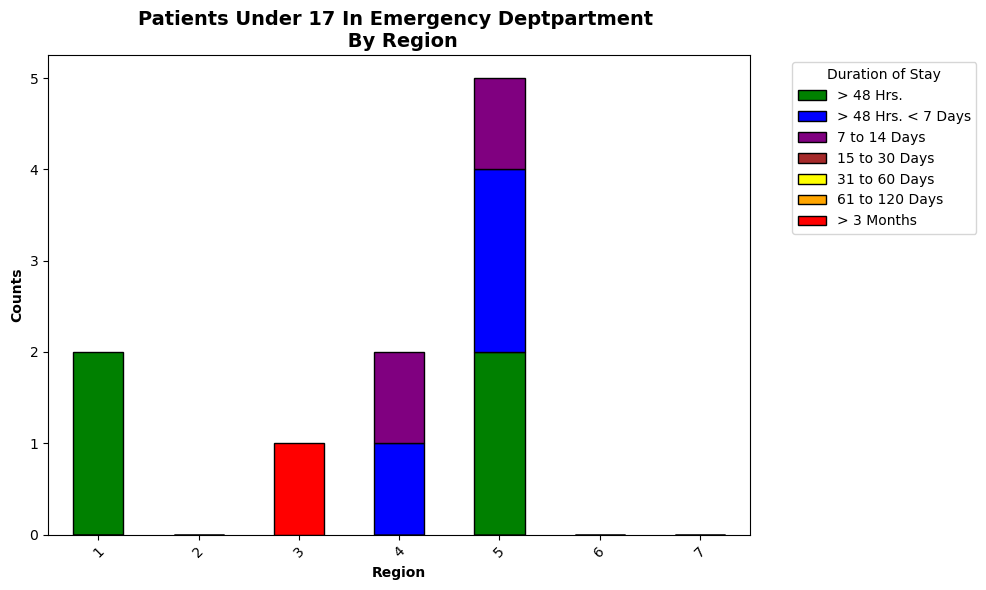

In [341]:
# Extract columns for stacking
columns_to_stack = [a,b,c,d,e,f,g]

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

grouped__u17.set_index("region")[columns_to_stack].plot(
        kind="bar", 
        stacked=True, 
        ax=ax, 
        color= ["green", "blue", "purple", "brown", "yellow", "orange", "red"], 
        edgecolor="black"
)

# Add title and labels
ax.set_title("Patients Under 17 In Emergency Deptpartment \n By Region", weight="bold", fontsize=14)
ax.set_ylabel("Counts", weight = "bold")
ax.set_xlabel("Region", weight = "bold")

# Add legend
ax.legend(title="Duration of Stay", bbox_to_anchor=(1.05, 1), loc="upper left")

# Rotate x-axis tick labels
ax.tick_params(axis="x", rotation=45)


# Show the plot
plt.tight_layout()
fig.savefig("../figs/ed_u17_summary.png", dpi = 300, bbox_inches="tight")
plt.show()
